In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
print(breast_data.shape)
breast_labels = breast.target
print(breast_labels.shape)
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
print(breast_dataset.head())

(569, 30)
(569,)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29   30  
0  0.4601  0.11890  0.0  
1  0.2750  0.0890

In [3]:
features = breast.feature_names
print(features)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
print(breast_dataset.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
normalised_breast = pd.DataFrame(x)
print(normalised_breast.head())

         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1

In [6]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
print(principal_breast_Df)

     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
..                     ...                    ...
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]


In [7]:
print(pca_breast.explained_variance_ratio_)

[0.44272026 0.18971182]


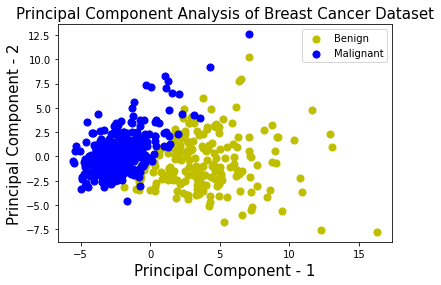

In [8]:
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15)
targets = ['Benign', 'Malignant']
colors = ['y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})